In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')
df.head()
df.shape

(913000, 4)

In [5]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


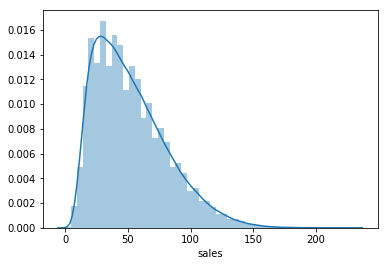

In [6]:
sns.distplot(df['sales'])

In [10]:
dt.head()
dt.columns

df['date'] = pd.to_datetime(df['date'])
#df['date'] = pd.to_numeric(df['date'])

df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek +1
df['year'] = df['date'].dt.year

df.head(10)

,date,store,item,sales,month,weekday,year
0,2013-01-01,1,1,13,1,2,2013
1,2013-01-02,1,1,11,1,3,2013
2,2013-01-03,1,1,14,1,4,2013
3,2013-01-04,1,1,13,1,5,2013
4,2013-01-05,1,1,10,1,6,2013
5,2013-01-06,1,1,12,1,7,2013
6,2013-01-07,1,1,10,1,1,2013
7,2013-01-08,1,1,9,1,2,2013
8,2013-01-09,1,1,12,1,3,2013
9,2013-01-10,1,1,9,1,4,2013


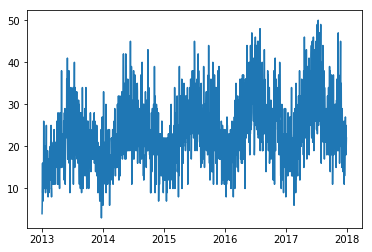

In [12]:



store1= df[(df['store'] == 2) & (df['item'] == 5)]
plt.plot(store1['date'],store1['sales'])



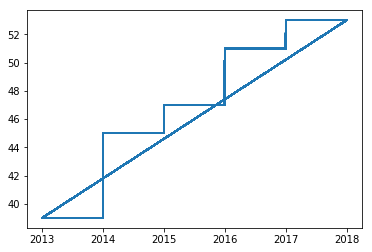

In [48]:
df["median-store_item-year"] = df.groupby(["year"])["sales"].transform("median")
df.head(20)
plt.plot(df['date'],df['median-store_item-year'])

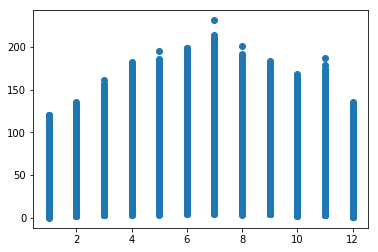

In [35]:
df["median-store_item-month"] = df.groupby(["month","year"])["sales"].transform("median")
plt.scatter(df['month'],df['sales'])

In [16]:
Y=df['sales']
Y.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

In [13]:
df.columns
dt.columns


Index(['id', 'date', 'store', 'item'], dtype='object')

In [22]:
features=['date','store','item']
X=df[features]
x_test=dt[features]

In [23]:
df['date'] = pd.to_numeric(df['date'])
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
dt['date'] = pd.to_datetime(dt['date']) 
dt['date'] = pd.to_numeric(dt['date'])

In [25]:
y_prediction = regressor.predict(x_test)
y_prediction

array([64.76670281, 64.777407  , 64.78811118, ..., 60.22168029,
       60.23238447, 60.24308866])

In [26]:
dt['sales']=y_prediction
dt['date']=pd.to_datetime(dt['date'])
dt.head()

,id,date,store,item,sales
0,0,2018-01-01,1,1,64.766703
1,1,2018-01-02,1,1,64.777407
2,2,2018-01-03,1,1,64.788111
3,3,2018-01-04,1,1,64.798815
4,4,2018-01-05,1,1,64.809520


In [27]:
sl=dt[['id','sales']]

sl.to_csv("solution.csv", index = False)
